# TP0: Introducción al Análisis de Datos
## Preguntas Guía

Se desea evaluar qué factores influyen en la captura de un Pokemon teniendo en cuenta los parámetros del mismo junto con la pokebola utilizada. Para ello se deberán generar distintos gráficos que representen las respuestas a las siguientes preguntas guía:

1. Acerca de las pokebolas:
    1. Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP: 100%, LVL 100) ¿Cuál es la probabilidad de capturar promedio para cada pokebola?
    2. ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justificar.
       > **Sugerencia**: Comparar efectividad (_success/total_attempts_) como proporción de la efectividad de la Pokebola básica para cada Pokemon

2. Acerca del estado del Pokemon:
    1. ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es ası́, ¿Cuál es más o menos efectiva?
    2. ¿Cómo afectan los puntos de vida a la efectividad de la captura?
       > **Sugerencia**: Elegir uno o dos Pokemones y manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos HP %

    3. ¿Qué parámetros son los que más afectan la probabilidad de captura?
    4. Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?
    5. A partir del punto anterior, ¿serı́a efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?

# Preparando el entorno

Para poder realizar las consignas solicitadas primero debemos preparare el entorno de trabajo, importando los módulos necesarios:

* `matplotlib`: módulo encargado de la realización de gráficos.
* `numpy`: módulo que simplifica los cálculos con vectores y matrices.

A su vez tenemos también módulos locales:

* `attempt_catch`: es la función encargada de calcular la probabilidad de atrapar al **Pokemon**.
* `PokemonFactory`: clase encargada de generar **Pokemones** en base a un archivo de entrada de tipo _json_.
* `StatusEffect`: estructura que simula toda la información respecto a los posibles estados de salud del **Pokemon**.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

Ahora, creamos un _factory_ encargado de generar todos los **Pokemones** en base a un archivo _json_ que los define.

In [19]:
factory = PokemonFactory("pokemon.json")

Definamos también los posibles **Pokemones**, junto con las posibles **Pokeballs** a utilizar en la resolución de las consignas.

In [20]:
pokemons = ["caterpie", "onix", "jolteon", "snorlax", "mewtwo"]
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

# Resolución

## Punto 1a

Para resolver este punto, realizaremos 100 intentos de captura con cada **Pokeball** por cada **Pokemon**. Calcularemos luego el promedio de todos los _capture_rate_ obtenidos.

In [21]:
results = {}

for pokemon_name in pokemons:
    results[pokemon_name] = {}
    pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, 1)

    for ball in pokeballs:
        results[pokemon_name][ball] = []

        for _ in range(100):
            _, capture_rate = attempt_catch(pokemon, ball)
            results[pokemon_name][ball].append(capture_rate)

Ahora que ya tenemos los resultados, calculemos el promedio de la probabilidad de capturar a cada **Pokemon**. Para eso realizaremos un gráfico por cada **Pokemon** que se intentó capturar, mostrando el promedio de la probabilidad de captura para cada **Pokeball**.

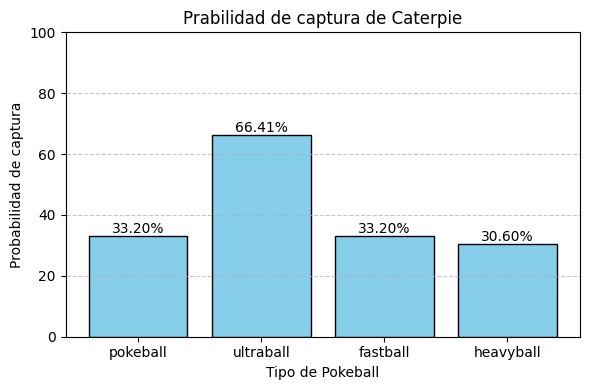

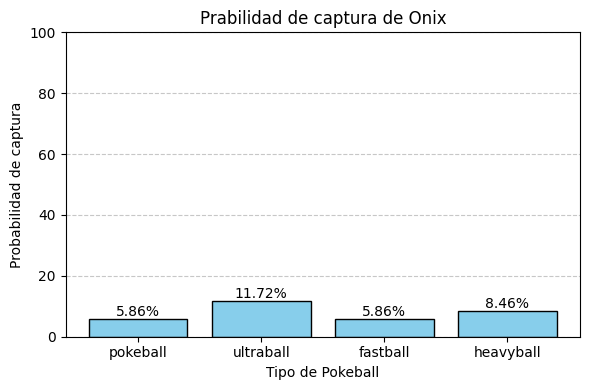

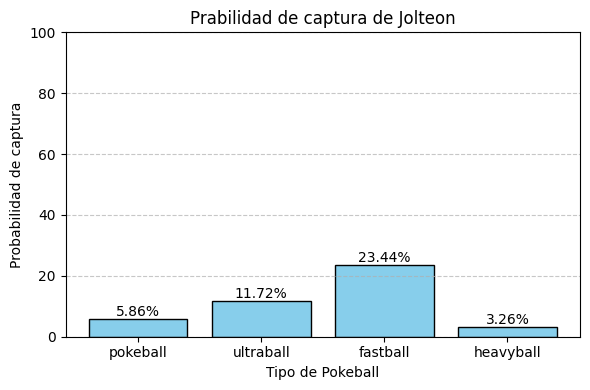

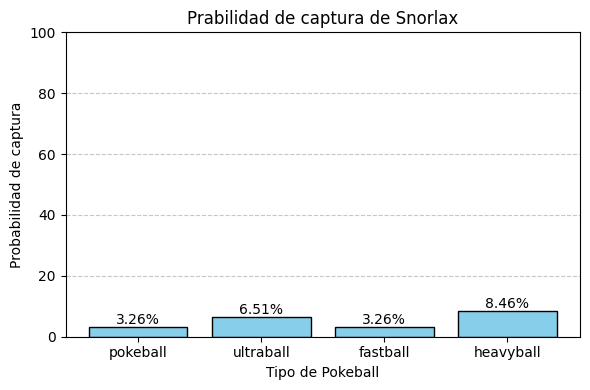

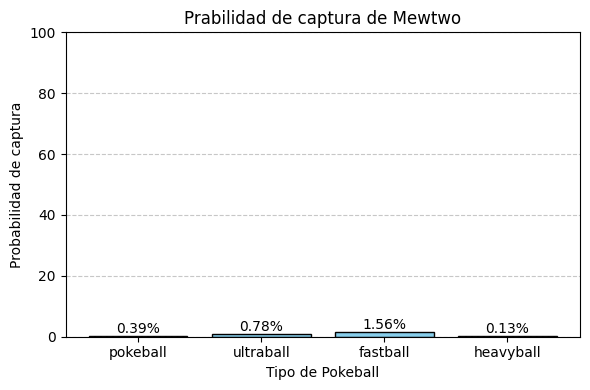

In [22]:
for pokemon, result_data in results.items():
    data = {ball: np.mean(r) * 100 for ball, r in result_data.items()}
    
    plt.figure(figsize=(6, 4))
    plt.bar(data.keys(), data.values(), edgecolor="black", color="skyblue")

    plt.xlabel("Tipo de Pokeball")
    plt.ylabel("Probabilidad de captura")
    plt.title(f"Prabilidad de captura de {pokemon.capitalize()}")

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.ylim(0, 100)

    for i, rate in enumerate(data.values()):
        plt.text(i, rate, f"{rate:.2f}%", ha="center", va="bottom")

    plt.tight_layout()
    plt.show(block=False)

In [23]:
# TODO: conclusion

## Punto 1b
Para resolver este punto realizamos 1000 intentos de captura con cada **Pokeball** por cada **Pokemon**. 
Luego se calcula el _success rate_ calculando el promedio de éxitos de cada **Pokeball** por cada **Pokemon**. Por último por cada **Pokeball** se calcula la efectividad relativa dividiendo su _success rate_ por la de la **Pokeball** básica.
Lo hacemos con 1000 intentos porque al hacerlo con 100 nos pasaba que la probabilidad de captura para la **Pokeball** básica quedaba muy cercano a 0 y al calcular el _success rate_ relativo nos daban números no representativos. 


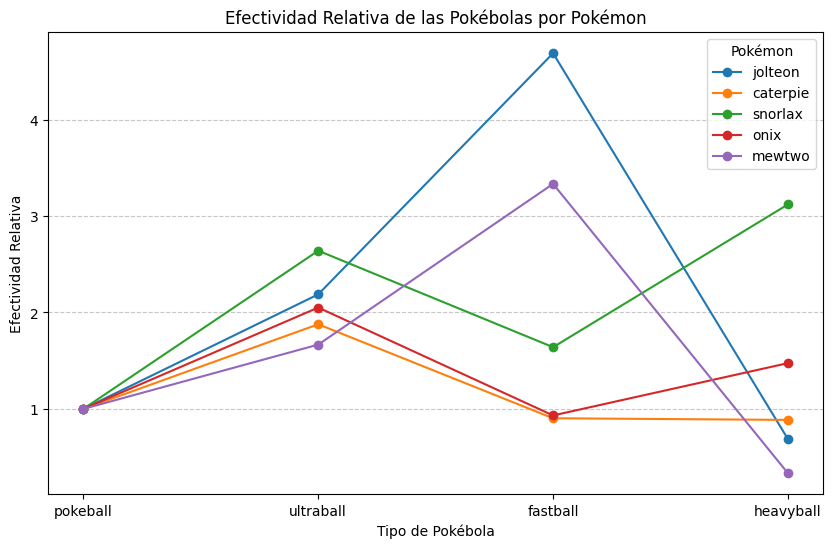

In [5]:
results = {pokemon: {ball: 0 for ball in pokeballs} for pokemon in pokemon_names}

for pokemon_name in pokemon_names:
    for ball in pokeballs:
        pokemon = factory.create(pokemon_name, 50, StatusEffect.NONE, 1.0)
        rates = [attempt_catch(pokemon, ball, 0.15)[0] for _ in range(1000)]
        results[pokemon_name][ball] = np.mean(rates)
    
relative_effectiveness = {}
    
for pokemon in pokemon_names:
    pokeball_success = results[pokemon]["pokeball"]
    relative_effectiveness[pokemon] = {ball: results[pokemon][ball] / pokeball_success for ball in pokeballs}

plt.figure(figsize=(10, 6))
for pokemon, effectiveness in relative_effectiveness.items():
    plt.plot(pokeballs, list(effectiveness.values()), marker='o', label=pokemon)

plt.xlabel("Tipo de Pokébola")
plt.ylabel("Efectividad Relativa")
plt.title("Efectividad Relativa de las Pokébolas por Pokémon")
plt.legend(title="Pokémon")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

En el gráfico podemos ver claramente la efectividad de cada Pokebola en relación a la Pokebola básica y llegamos a la conclusión de que efectivamente es cierto que algunas Pokebolas son más o menos efectivas dependiendo de las propiedades intrínsecas de cada Pokemon. Por ejemplo la Heavyball es más efectiva que la Pokebola básica para atrapar al Snorlax pero menos efectiva para atrapar al Mewtwo. Otro ejemplo que también se puede ver en el gráfico es que la mejor Pokebola para atrapar al Jolteon es la Fastball.
Estos resultados reflejan que la elección de la Pokebola adecuada puede influir significativamente en la probabilidad de captura de cada Pokemon.

## Punto 2a

Veamos ahora como se ve afectada la efectividad para la captura de los **Pokemones** dependiendo de los estados de salud de los mismos. Para eso vamos a definir los estados de salud que vamos a estar analizando.

In [24]:
effects = [StatusEffect.NONE, StatusEffect.POISON, StatusEffect.BURN, StatusEffect.PARALYSIS, StatusEffect.SLEEP, StatusEffect.FREEZE]

Intentemos ahora calcular a **Onix** y a **Caterpie** 100 veces cada uno en cada uno de los posibles estados de salud que definimos.

In [25]:
results = {}

for pokemon_name in ["onix", "caterpie"]:
    results[pokemon_name] = {}

    for effect in effects:
        results[pokemon_name][effect.name] = []
        pokemon = factory.create(pokemon_name, 100, effect, 1)

        for _ in range(100):
            success, _ = attempt_catch(pokemon, "pokeball", 0.15)
            results[pokemon_name][effect.name].append(success)

Ahora grafiquemos para ver como varía la efectividad de los diferentes estados de salud.

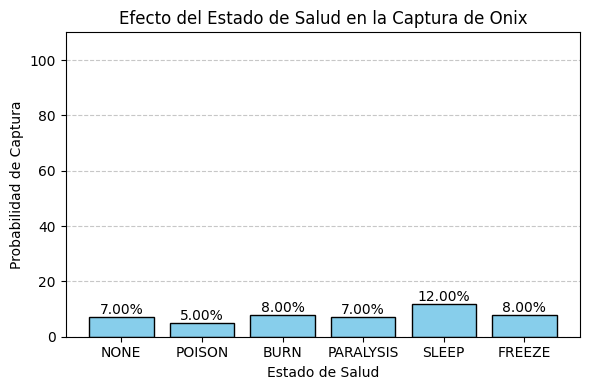

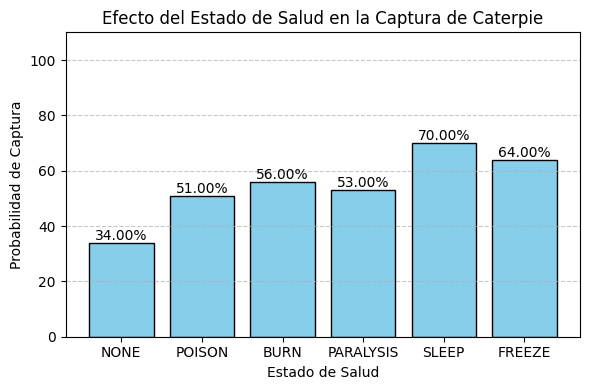

In [26]:
for pokemon, result_data in results.items():
    data = {effect: np.mean(r) * 100 for effect, r in result_data.items()}

    plt.figure(figsize=(6, 4))
    plt.bar(data.keys(), data.values(), edgecolor="black", color="skyblue")

    plt.xlabel("Estado de Salud")
    plt.ylabel("Probabilidad de Captura")
    plt.title(f"Efecto del Estado de Salud en la Captura de {pokemon.capitalize()}")

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.ylim(0, 110)

    for i, rate in enumerate(data.values()):
        plt.text(i, rate, f"{rate:.2f}%", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

Por más que el porcentaje de efectividad en cada caso es diferente, podemos ver claramente como el estado de "_sueño_" y "_congelamiento_" afectan en mucho mayor medida a la efectividad en la captura de los **Pokemones**. Incluso en menores grados, podemos ver que todos los efectos de salud, aumentan a la efectividad de la captura, ya que en comparación al caso de que no se haya aplicado ningún efecto, estos son mucho mayores.

## Punto 2b

Veamos ahora, de forma similar, como afectan los puntos de vida restantes al intentar capturar a los **Pokemones**. Para este caso, usaremos los mismos **Pokemones** del caso anterior (**Onix** y **Caterpie**), manteniendo el nivel en 100, sin efectos de salud y utilizando la **Pokeball** básica.

Definamos entonces para eso los valores de vida que estaremos utilizando.

In [27]:
healths = ["1.00", "0.75", "0.50", "0.25", "0.01"]

Ahora, intentemos atrapar a los **Pokemones** mencionados, 100 veces cada uno por cada puntaje de vida disponible.

In [28]:
results = {}

for pokemon_name in ["onix", "caterpie"]:
    results[pokemon_name] = {}

    for health in healths:
        results[pokemon_name][health] = []
        pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, float(health))

        for _ in range(100):
            success, _ = attempt_catch(pokemon, "pokeball")
            results[pokemon_name][health].append(success)

Con los resultados disponibles, calculemos la efectividad en cada caso y grafiquemos los resultados.

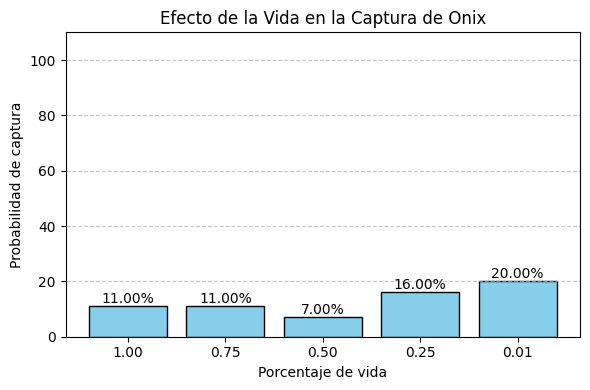

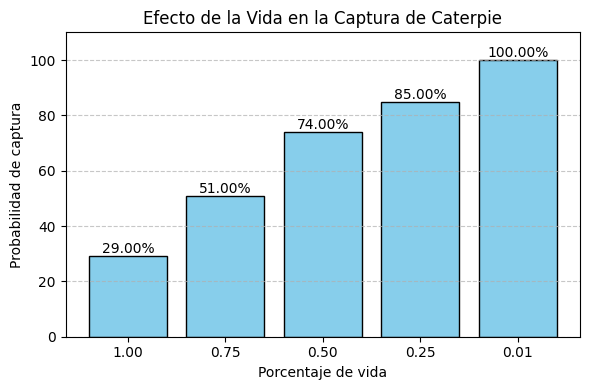

In [29]:
for pokemon, result_data in results.items():
    data = {health: np.mean(r) * 100 for health, r in result_data.items()}

    plt.figure(figsize=(6, 4))
    plt.bar(data.keys(), data.values(), edgecolor="black", color="skyblue")

    plt.xlabel("Porcentaje de vida")
    plt.ylabel("Probabilidad de captura")
    plt.title(f"Efecto de la Vida en la Captura de {pokemon.capitalize()}")

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.ylim(0, 110)

    for i, rate in enumerate(data.values()):
        plt.text(i, rate, f"{rate:.2f}%", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

In [30]:
# TODO: conclusion

## Punto 2c

Ya analizamos como varía la efectividad al agregar efectos de salud y al modificar los puntos de vida del **Pokemon**. Veamos por último como varía la efectividad al modificar el nivel de **Pokemon**. Nuevamente, probaremos con **Onix** y **Caterpie**, que son los que estuvimos utilizando hasta el momento. Definamos entonces los posibles niveles a probar.

In [31]:
levels = ["1", "25", "50", "75", "100"]

Manteniendo la vida al máximo y sin aplicar efectos de salud, veamos como varía la efectividad al intentar atrapar a los **Pokemones** mencionados 100 veces.

In [32]:
results = {}

for pokemon_name in ["onix", "caterpie"]:
    results[pokemon_name] = {}

    for level in levels:
        results[pokemon_name][level] = []
        pokemon = factory.create(pokemon_name, int(level), StatusEffect.NONE, 1)

        for _ in range(100):
            success, _ = attempt_catch(pokemon, "pokeball")
            results[pokemon_name][level].append(success)

Con los resultados disponibles, calculemos la efectividad por cada nivel y grafiquemos los valores obtenidos.

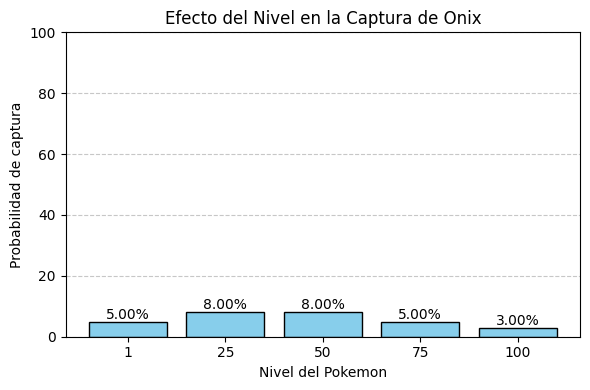

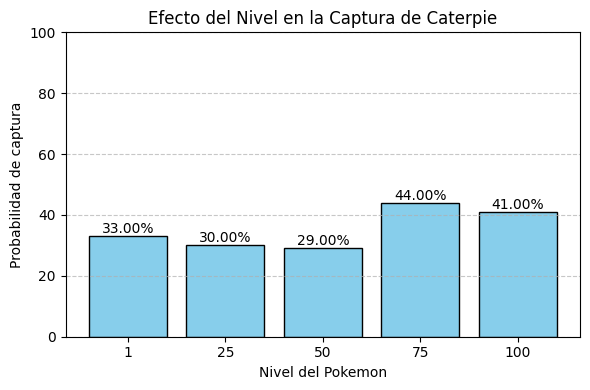

In [33]:
for pokemon, result_data in results.items():
    data = {level: np.mean(r) * 100 for level, r in result_data.items()}

    plt.figure(figsize=(6, 4))
    plt.bar(data.keys(), data.values(), edgecolor="black", color="skyblue")

    plt.xlabel("Nivel del Pokemon")
    plt.ylabel("Probabilidad de captura")
    plt.title(f"Efecto del Nivel en la Captura de {pokemon.capitalize()}")

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.ylim(0, 100)

    for i, rate in enumerate(data.values()):
        plt.text(i, rate, f"{rate:.2f}%", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

In [34]:
# TODO: conclusion

## Punto 2d

## Punto 2e